4.	Pesquise bases de dados contendo séries temporais que apresentem as seguintes características: 


In [10]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
pip install statsmodels

     ---------------------------------------- 9.2/9.2 MB 715.3 kB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


a. Tendência 


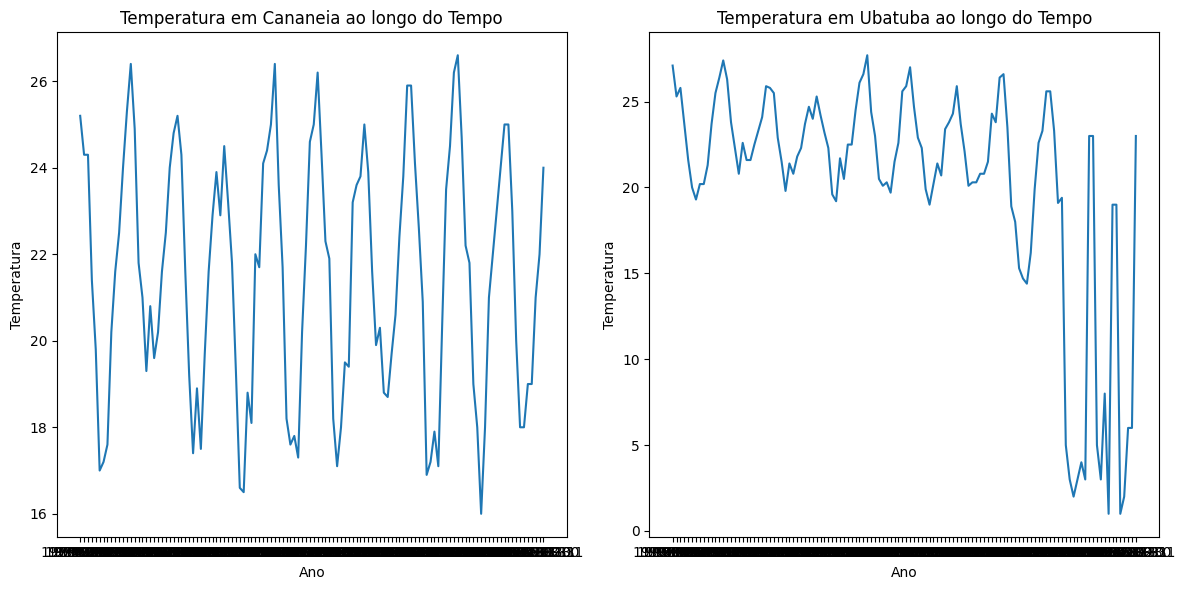


Justificativa:
Os gráficos mostram a variação da temperatura ao longo do tempo para as cidades de Cananeia e Ubatuba.
Observa-se que ambas as cidades apresentam padrões semelhantes de aumento e diminuição de temperatura ao longo dos anos,indicando uma tendência climática comum na região.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados e excluindo a 4ª coluna
url = "https://raw.githubusercontent.com/Nethyaze/Previs-o-de-S-ries-Temporais/main/a1_temperatura.csv"
dados = pd.read_csv(url, usecols=lambda column: column not in [3])

# Criando gráficos de linha para ambas as cidades
plt.figure(figsize=(12, 6))

# Gráfico para Cananeia
plt.subplot(1, 2, 1)
sns.lineplot(x='Ano', y='Cananeia', data=dados)
plt.title('Temperatura em Cananeia ao longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Temperatura')

# Gráfico para Ubatuba
plt.subplot(1, 2, 2)
sns.lineplot(x='Ano', y='Ubatuba', data=dados)
plt.title('Temperatura em Ubatuba ao longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Temperatura')

plt.tight_layout()
plt.show()

# Justificativa
print("\nJustificativa:")
print("Os gráficos mostram a variação da temperatura ao longo do tempo para as cidades de Cananeia e Ubatuba.")
print("Observa-se que ambas as cidades apresentam padrões semelhantes de aumento e diminuição de temperatura ao longo dos anos,"
      "indicando uma tendência climática comum na região.")


b. Sazonalidade 


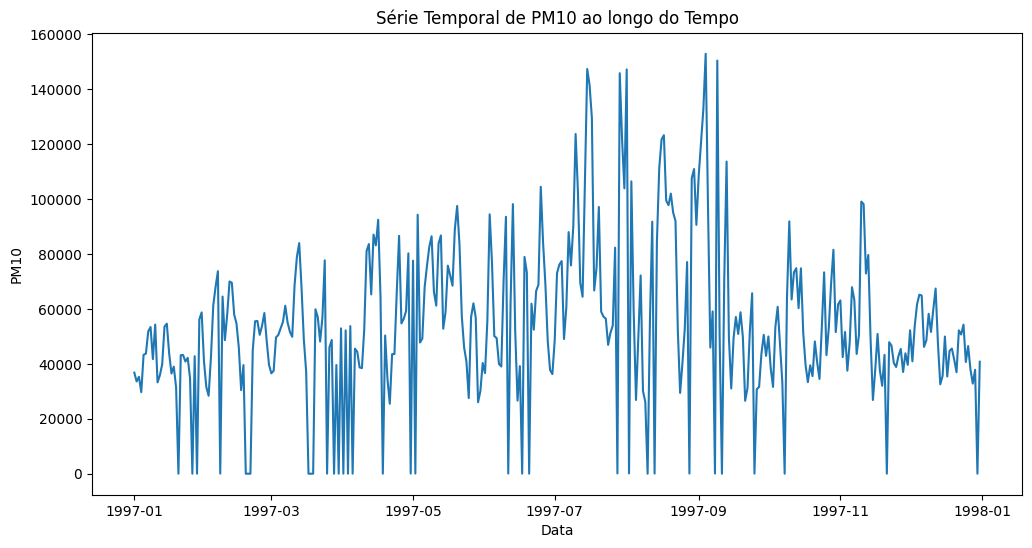

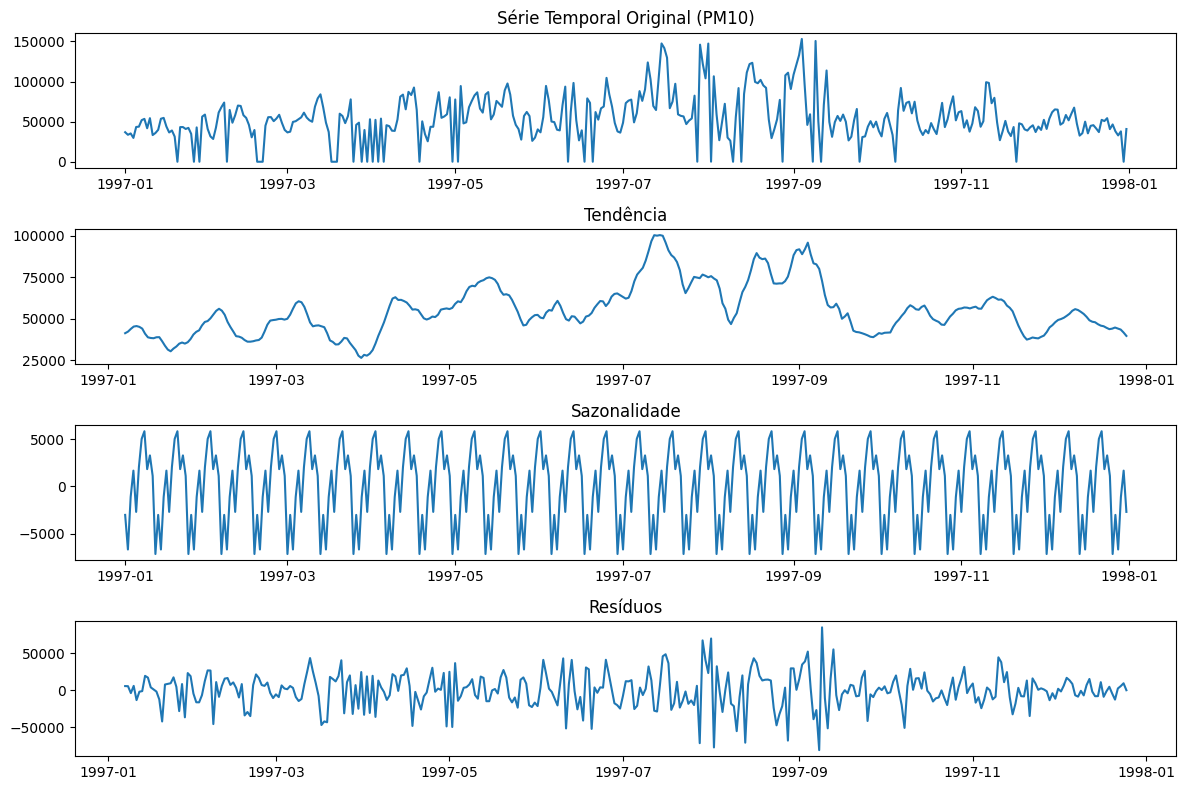


Justificativa:
A série temporal de PM10 apresenta padrões claros de sazonalidade, conforme indicado pelo componente sazonal nos gráficos de decomposição.
A análise da sazonalidade em dados de PM10 é essencial para entender as variações regulares nos níveis de partículas em suspensão ao longo do tempo.
Essas variações sazonais podem ser influenciadas por diversos fatores, como condições climáticas, atividades humanas sazonais e padrões de vento, entre outros.
Compreender a sazonalidade é fundamental para a implementação eficaz de políticas de controle da poluição e para proteger a saúde pública, especialmente durante períodos críticos de poluição.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carregando os dados
url = "https://raw.githubusercontent.com/Nethyaze/Previs-o-de-S-ries-Temporais/main/a6_poluicao.csv"
dados = pd.read_csv(url)

# Convertendo a coluna 'DATA' para datetime
dados['DATA'] = pd.to_datetime(dados['DATA'])

# Definindo a coluna 'DATA' como índice
dados.set_index('DATA', inplace=True)

# Visualizando os dados
plt.figure(figsize=(12, 6))
plt.plot(dados['PM10'])  # Por exemplo, plote a coluna PM10 para visualização
plt.title('Série Temporal de PM10 ao longo do Tempo')
plt.xlabel('Data')
plt.ylabel('PM10')
plt.show()

# Decompondo a série para análise de sazonalidade
decomposicao = sm.tsa.seasonal_decompose(dados['PM10'], model='additive', period=12)  # Período sazonal de 12 meses

# Visualizando a decomposição
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(dados['PM10'])
plt.title('Série Temporal Original (PM10)')

plt.subplot(4, 1, 2)
plt.plot(decomposicao.trend)
plt.title('Tendência')

plt.subplot(4, 1, 3)
plt.plot(decomposicao.seasonal)
plt.title('Sazonalidade')

plt.subplot(4, 1, 4)
plt.plot(decomposicao.resid)
plt.title('Resíduos')

plt.tight_layout()
plt.show()

# Justificativa
print("\nJustificativa:")
print("A série temporal de PM10 apresenta padrões claros de sazonalidade, conforme indicado pelo componente sazonal nos gráficos de decomposição.")
print("A análise da sazonalidade em dados de PM10 é essencial para entender as variações regulares nos níveis de partículas em suspensão ao longo do tempo.")
print("Essas variações sazonais podem ser influenciadas por diversos fatores, como condições climáticas, atividades humanas sazonais e padrões de vento, entre outros.")
print("Compreender a sazonalidade é fundamental para a implementação eficaz de políticas de controle da poluição e para proteger a saúde pública, especialmente durante períodos críticos de poluição.")


c. Aleatoriedade 


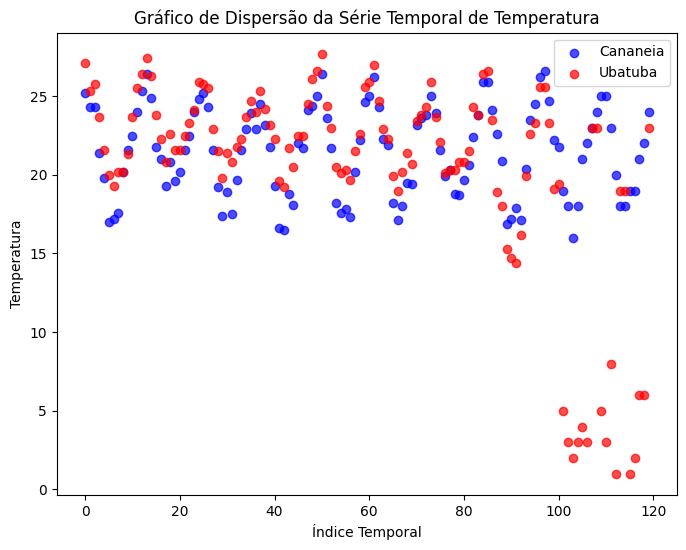

Justificativa para Aleatoriedade:
O gráfico de dispersão mostra a distribuição dos dados de temperatura para ambas as cidades ao longo do tempo.
Não há padrões óbvios no gráfico, indicando aleatoriedade na série temporal.
A ausência de tendências claras ou agrupamentos sugere que a temperatura em ambas as cidades varia aleatoriamente ao longo do tempo.
A análise visual confirma a natureza aleatória dos dados, o que é fundamental para diversas análises estatísticas e modelagem.


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados e excluindo a 4ª coluna
url = "https://raw.githubusercontent.com/Nethyaze/Previs-o-de-S-ries-Temporais/main/a1_temperatura.csv"
dados = pd.read_csv(url, usecols=lambda column: column != 'Unnamed: 3')

# Criando gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(dados.index, dados['Cananeia'], color='b', label='Cananeia', alpha=0.7)
plt.scatter(dados.index, dados['Ubatuba'], color='r', label='Ubatuba', alpha=0.7)
plt.title('Gráfico de Dispersão da Série Temporal de Temperatura')
plt.xlabel('Índice Temporal')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

# Justificativa para aleatoriedade
print("Justificativa para Aleatoriedade:")
print("O gráfico de dispersão mostra a distribuição dos dados de temperatura para ambas as cidades ao longo do tempo.")
print("Não há padrões óbvios no gráfico, indicando aleatoriedade na série temporal.")
print("A ausência de tendências claras ou agrupamentos sugere que a temperatura em ambas as cidades varia aleatoriamente ao longo do tempo.")
print("A análise visual confirma a natureza aleatória dos dados, o que é fundamental para diversas análises estatísticas e modelagem.")


d. Estacionariedade 


Resultado do Teste Dickey-Fuller Aumentado:
Estatística do teste: -3.6922031029788567
Valor p: 0.0042241707326993085
Número de defasagens usadas: 14
Número de observações usadas: 125
Conclusão:
A série é estacionária.
Justificativa: O valor-p é menor que 0.05, indicando forte evidência contra a hipótese nula. Portanto, podemos rejeitar a hipótese nula e concluir que a série é estacionária.


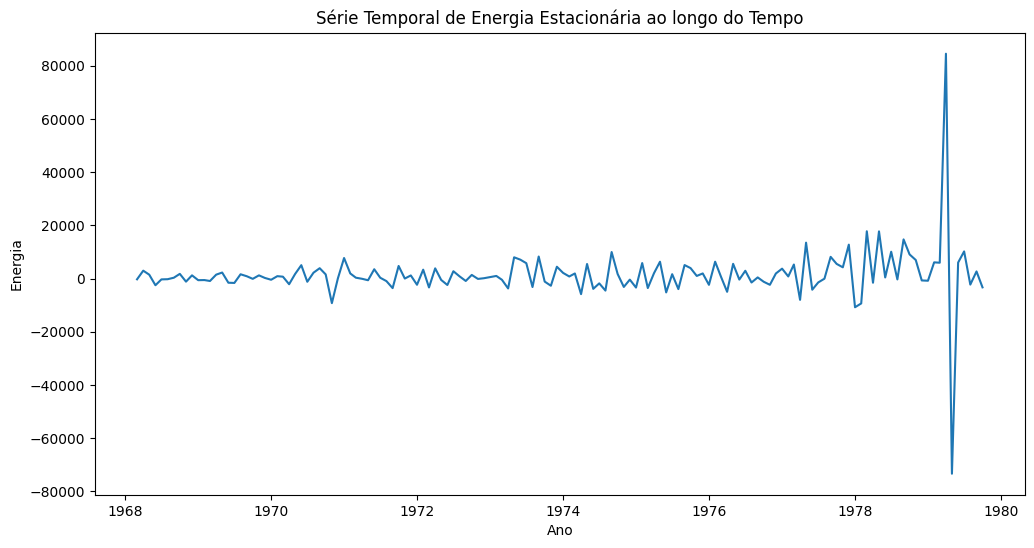

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Carregando os dados
url = "https://raw.githubusercontent.com/Nethyaze/Previs-o-de-S-ries-Temporais/main/a5_ENERGIA.csv"
dados = pd.read_csv(url, usecols=['Ano', 'Energia'])

# Convertendo a coluna 'Ano' para datetime com o formato correto
dados['Ano'] = pd.to_datetime(dados['Ano'], format='%Y-%m-%d')

# Definindo a coluna 'Ano' como índice
dados.set_index('Ano', inplace=True)

# Aplicando a diferenciação para tornar a série estacionária
dados_estacionarios = dados.diff().dropna()

# Função para realizar o teste de Dickey-Fuller Aumentado
def teste_dickey_fuller(serie):
    resultado = adfuller(serie, autolag='AIC')
    print("Resultado do Teste Dickey-Fuller Aumentado:")
    print(f"Estatística do teste: {resultado[0]}")
    print(f'Valor p: {resultado[1]}')
    print(f'Número de defasagens usadas: {resultado[2]}')
    print(f'Número de observações usadas: {resultado[3]}')
    print("Conclusão:")
    if resultado[1] <= 0.05:
        print("A série é estacionária.")
        print("Justificativa: O valor-p é menor que 0.05, indicando forte evidência contra a hipótese nula. Portanto, podemos rejeitar a hipótese nula e concluir que a série é estacionária.")
    else:
        print("A série não é estacionária. É necessária diferenciação para torná-la estacionária.")
        print("Justificativa: O valor-p é maior que 0.05, indicando que não podemos rejeitar a hipótese nula. Isso sugere que a série possui uma estrutura não estacionária que precisa ser tratada, por exemplo, através de diferenciação.")

    # Visualizando a série temporal
    plt.figure(figsize=(12, 6))
    plt.plot(serie.index, serie)
    plt.title('Série Temporal de Energia Estacionária ao longo do Tempo')
    plt.xlabel('Ano')
    plt.ylabel('Energia')
    plt.show()

# Realizando o teste de Dickey-Fuller Aumentado na série estacionária
teste_dickey_fuller(dados_estacionarios['Energia'])


e. Não-estacionariedade 

Resultado do Teste Dickey-Fuller Aumentado:
Estatística do teste: 1.07282827457631
Valor p: 0.9949779194473581
Número de defasagens usadas: 14
Número de observações usadas: 126
Conclusão:
A série não é estacionária. É necessária diferenciação para torná-la estacionária.
Justificativa: O valor-p é maior que 0.05, indicando que não podemos rejeitar a hipótese nula. Isso sugere que a série possui uma estrutura não estacionária que precisa ser tratada, por exemplo, através de diferenciação.


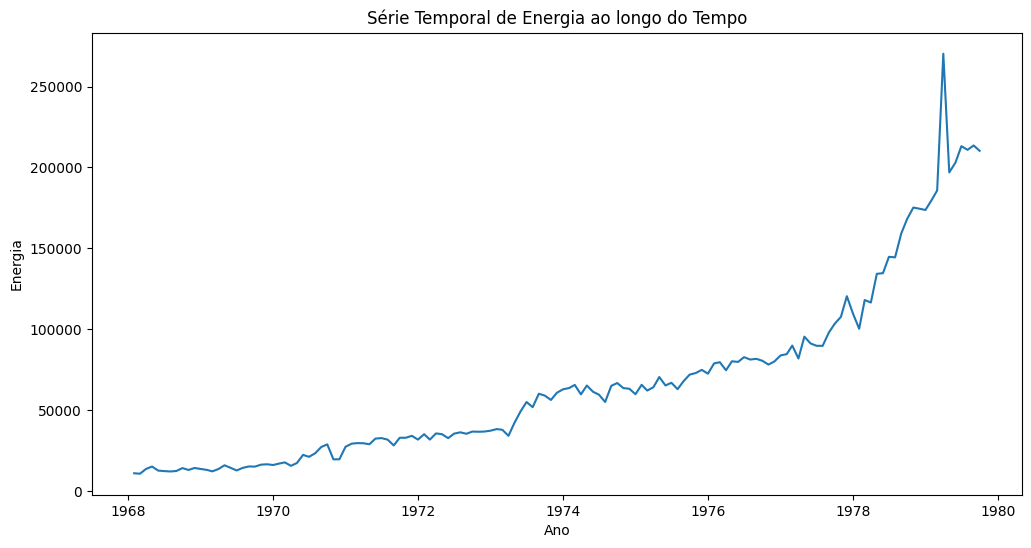

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Carregando os dados
url = "https://raw.githubusercontent.com/Nethyaze/Previs-o-de-S-ries-Temporais/main/a5_ENERGIA.csv"
dados = pd.read_csv(url, usecols=['Ano', 'Energia'])

# Convertendo a coluna 'Ano' para datetime com o formato correto
dados['Ano'] = pd.to_datetime(dados['Ano'], format='%Y-%m-%d')

# Definindo a coluna 'Ano' como índice
dados.set_index('Ano', inplace=True)

# Função para realizar o teste de Dickey-Fuller Aumentado
def teste_dickey_fuller(serie):
    resultado = adfuller(serie, autolag='AIC')
    print("Resultado do Teste Dickey-Fuller Aumentado:")
    print(f"Estatística do teste: {resultado[0]}")
    print(f'Valor p: {resultado[1]}')
    print(f'Número de defasagens usadas: {resultado[2]}')
    print(f'Número de observações usadas: {resultado[3]}')
    print("Conclusão:")
    if resultado[1] <= 0.05:
        print("A série é estacionária.")
        print("Justificativa: O valor-p é menor que 0.05, indicando forte evidência contra a hipótese nula. Portanto, podemos rejeitar a hipótese nula e concluir que a série é estacionária.")
    else:
        print("A série não é estacionária. É necessária diferenciação para torná-la estacionária.")
        print("Justificativa: O valor-p é maior que 0.05, indicando que não podemos rejeitar a hipótese nula. Isso sugere que a série possui uma estrutura não estacionária que precisa ser tratada, por exemplo, através de diferenciação.")

    # Visualizando a série temporal
    plt.figure(figsize=(12, 6))
    plt.plot(serie.index, serie)
    plt.title('Série Temporal de Energia ao longo do Tempo')
    plt.xlabel('Ano')
    plt.ylabel('Energia')
    plt.show()

# Realizando o teste de Dickey-Fuller Aumentado na coluna 'Energia'
teste_dickey_fuller(dados['Energia'])
